In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scprep
import pickle
import pathlib

In [2]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')
traj_A = np.load('../results_final_Dec22/trajectories_A_extreme.npy')
traj_T = np.load('../results_final_Dec22/trajectories_T_extreme.npy')
with open('../results_final_Dec22/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
X_phate = scaler.transform(adata.obsm['X_phate'])
traj_A_gene_all = np.load('../results_final_Dec22/traj_gene_space_A.npy')
traj_T_gene_all = np.load('../results_final_Dec22/traj_gene_space_T.npy')

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
save_path = '../results_final_Jan30'
pathlib.Path(save_path).mkdir(parents=True, exist_ok=True)

In [4]:
genes_of_interest = ['ARNT',
'CEBPB',
'LEF1',
'SNAI2',
'FOXO1',
'ESRRA',
'NR2F2',
'ETV1',
'SP1',
'E2F1',
'ZFHX3',
'FOXO3',
'ELF3',
'YBX1',
'ZEB1',
'ZEB2'
]

In [5]:
# [Zeb1, CDH1, Epcam, Esrra and Cav1, p53 and Bax]
genes_to_plot = genes_of_interest
# assert all([g in adata.var_names for g in genes_to_plot])
for g in genes_to_plot:
    print(g, g in adata.var_names)

gene_mask = np.isin(adata.var_names, genes_to_plot)
traj_A_gene = traj_A_gene_all[:, :, gene_mask]
traj_T_gene = traj_T_gene_all[:, :, gene_mask]
gene_names = adata.var_names[gene_mask]

traj_A_mean = np.mean(traj_A_gene, axis=1)
traj_A_std = np.std(traj_A_gene, axis=1)
traj_T_mean = np.mean(traj_T_gene, axis=1)
traj_T_std = np.std(traj_T_gene, axis=1)



ARNT True
CEBPB True
LEF1 True
SNAI2 True
FOXO1 True
ESRRA True
NR2F2 True
ETV1 True
SP1 True
E2F1 True
ZFHX3 True
FOXO3 True
ELF3 True
YBX1 True
ZEB1 True
ZEB2 True


In [6]:
traj_A_mean.shape

(100, 16)

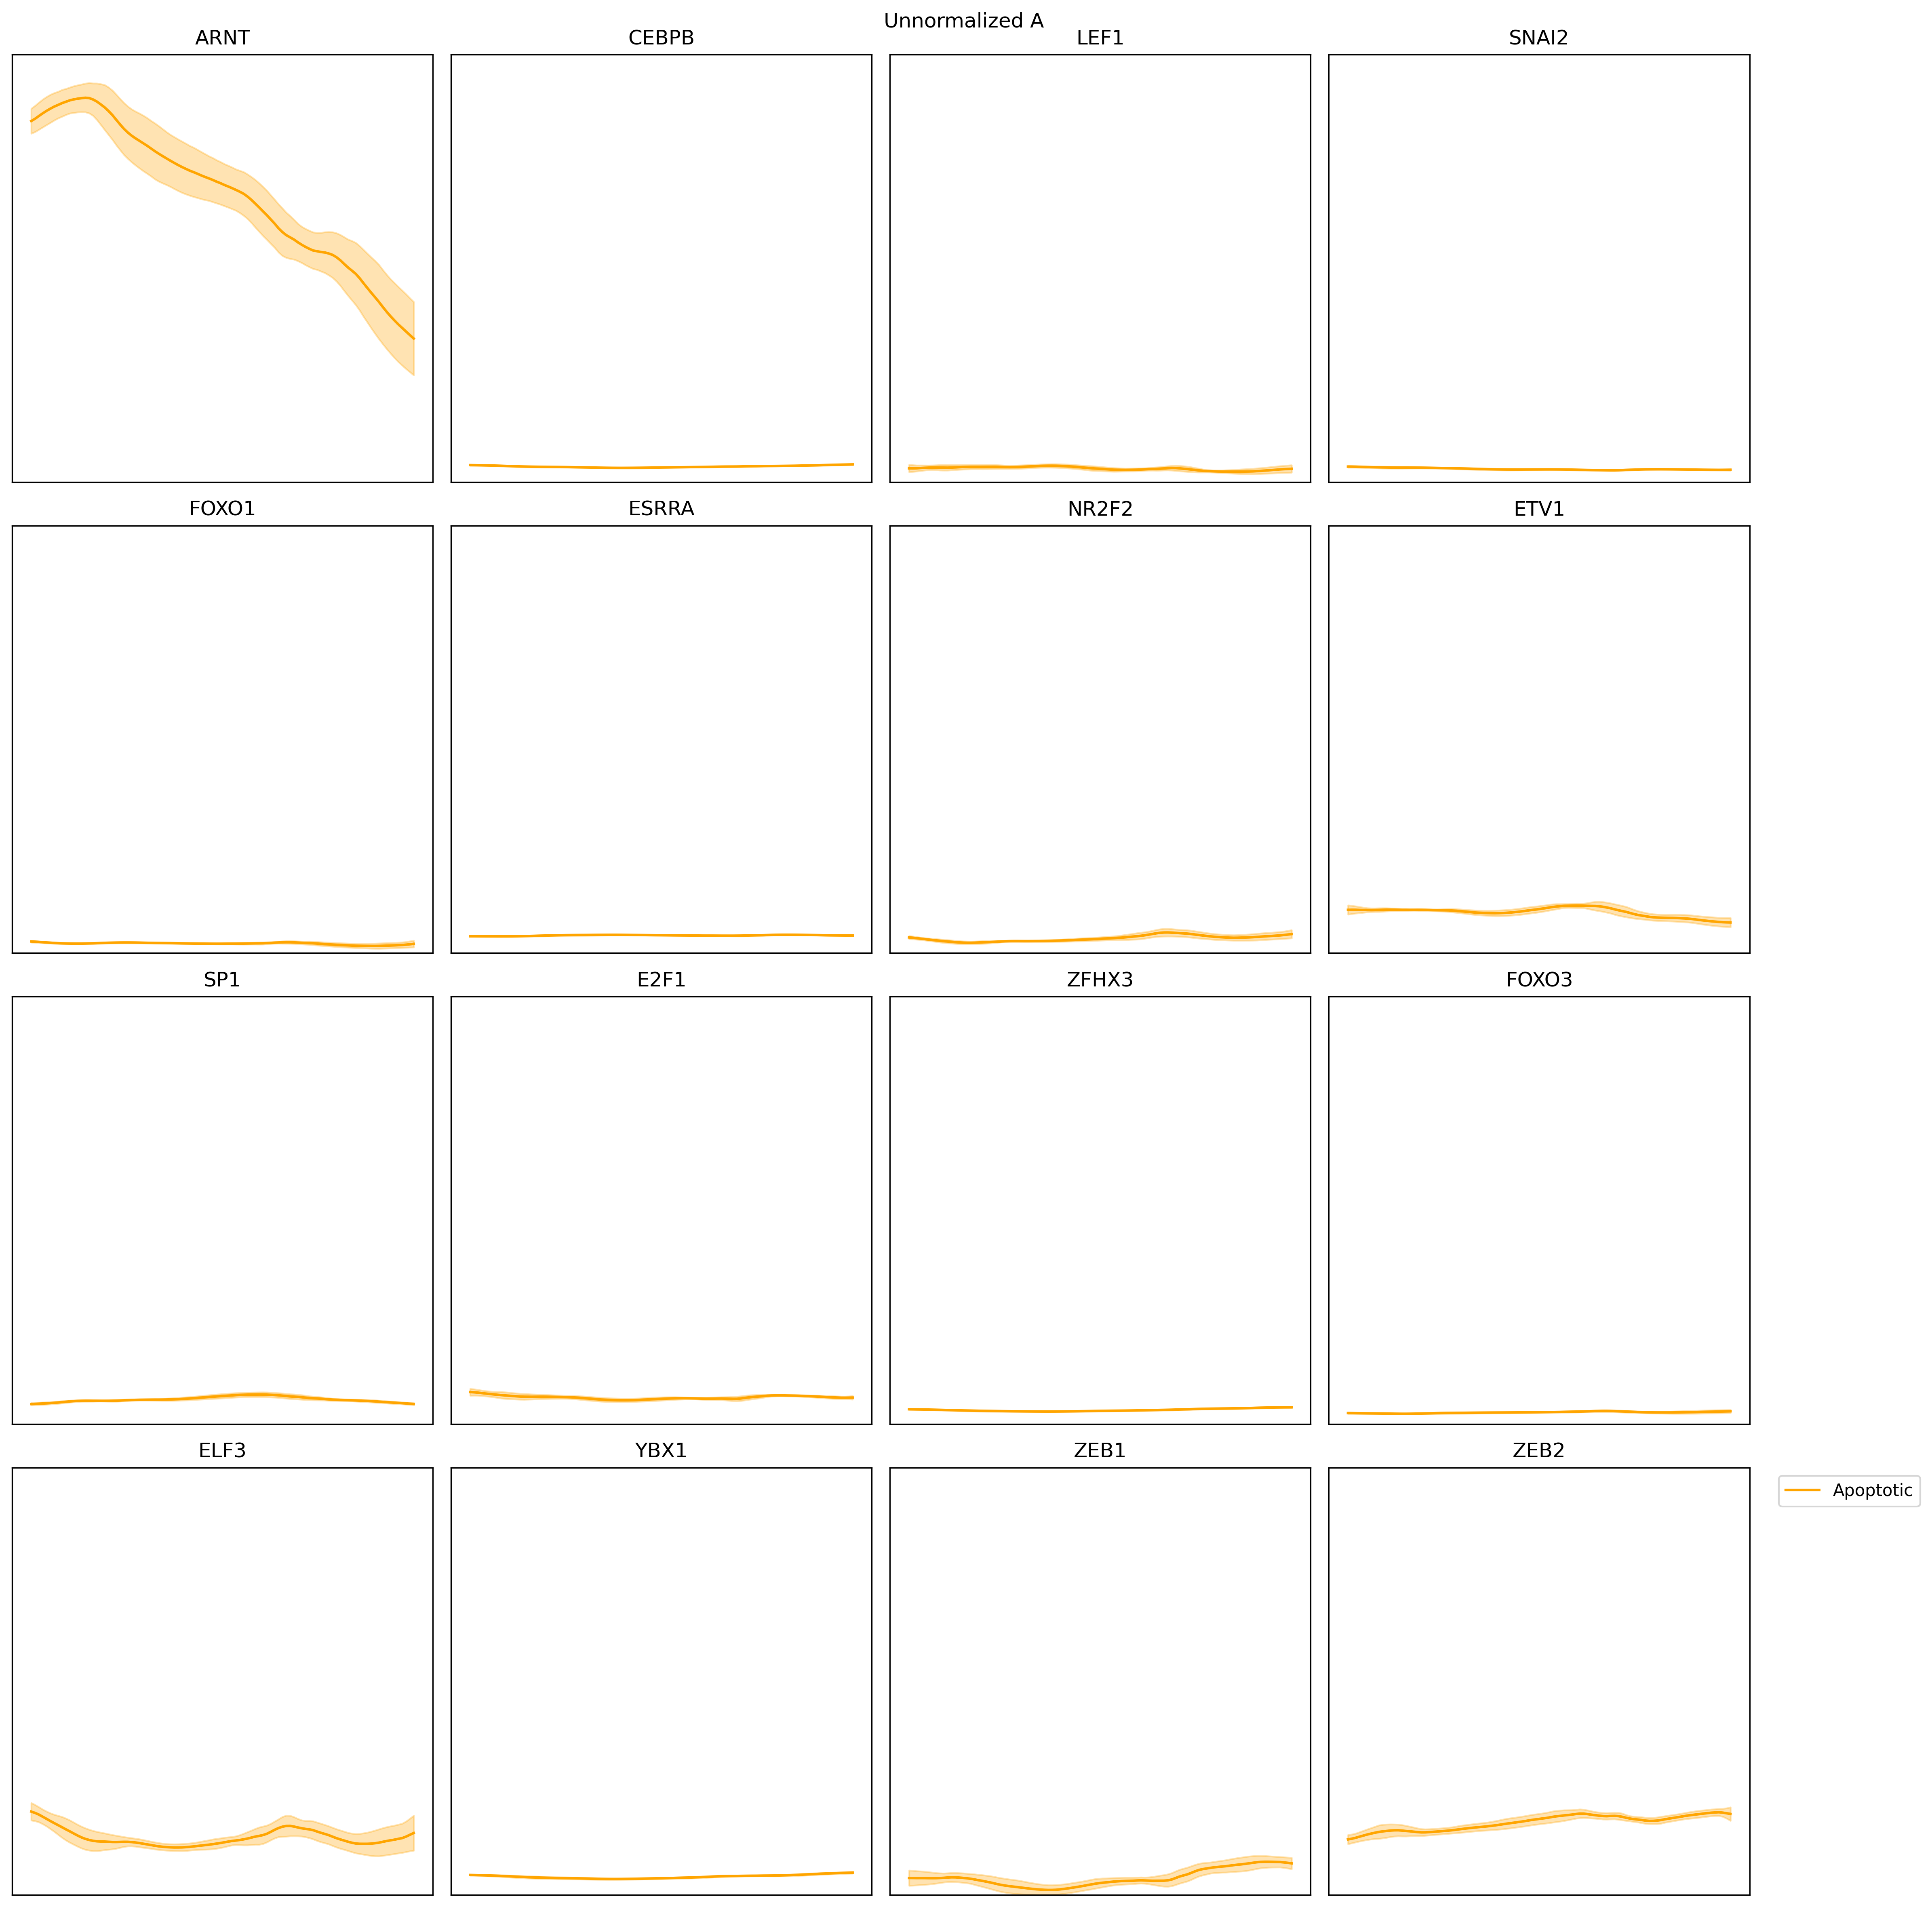

In [12]:
# genes_to_plot = top_apoptosis_markers_pos
# gene_mask = np.isin(adata.var_names, genes_to_plot)
# traj_A_gene = traj_A_gene_all[:, :, gene_mask]
# traj_T_gene = traj_T_gene_all[:, :, gene_mask]
# gene_names = adata.var_names[gene_mask]

# traj_A_mean = np.mean(traj_A_gene, axis=1)
# traj_A_std = np.std(traj_A_gene, axis=1)
# traj_T_mean = np.mean(traj_T_gene, axis=1)
# traj_T_std = np.std(traj_T_gene, axis=1)

# Calculate number of rows and columns for a roughly square grid
n_genes = len(genes_to_plot)
n_cols = int(np.ceil(np.sqrt(n_genes)))
n_rows = int(np.ceil(n_genes / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows), dpi=300)
axes = axes.flatten()  # Flatten axes array for easier indexing

# Find global min and max values across all genes
y_min = min(np.min(traj_A_mean - traj_A_std), np.min(traj_T_mean - traj_T_std))
y_max = max(np.max(traj_A_mean + traj_A_std), np.max(traj_T_mean + traj_T_std))

for i, gene in enumerate(genes_to_plot):
    ax = axes[i]
    ax.plot(traj_A_mean[:, i], color='orange', label='Apoptotic')
    ax.fill_between(range(traj_A_mean.shape[0]), traj_A_mean[:, i] - traj_A_std[:, i], traj_A_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='orange')
    # ax.plot(traj_T_mean[:, i], color='green', label='Tumor-forming')
    # ax.fill_between(range(traj_T_mean.shape[0]), traj_T_mean[:, i] - traj_T_std[:, i], traj_T_mean[:, i] + traj_T_std[:, i], alpha=0.3, color='green')
    ax.set_title(gene)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.set_ylim(y_min, y_max)  # Set same y-axis limits for all subplots


# Hide any empty subplots
for i in range(len(genes_to_plot), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Unnormalized A')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
# plt.savefig(f'{save_path}/apoptosis_markers_up.png', bbox_inches='tight', dpi=300)
plt.show()

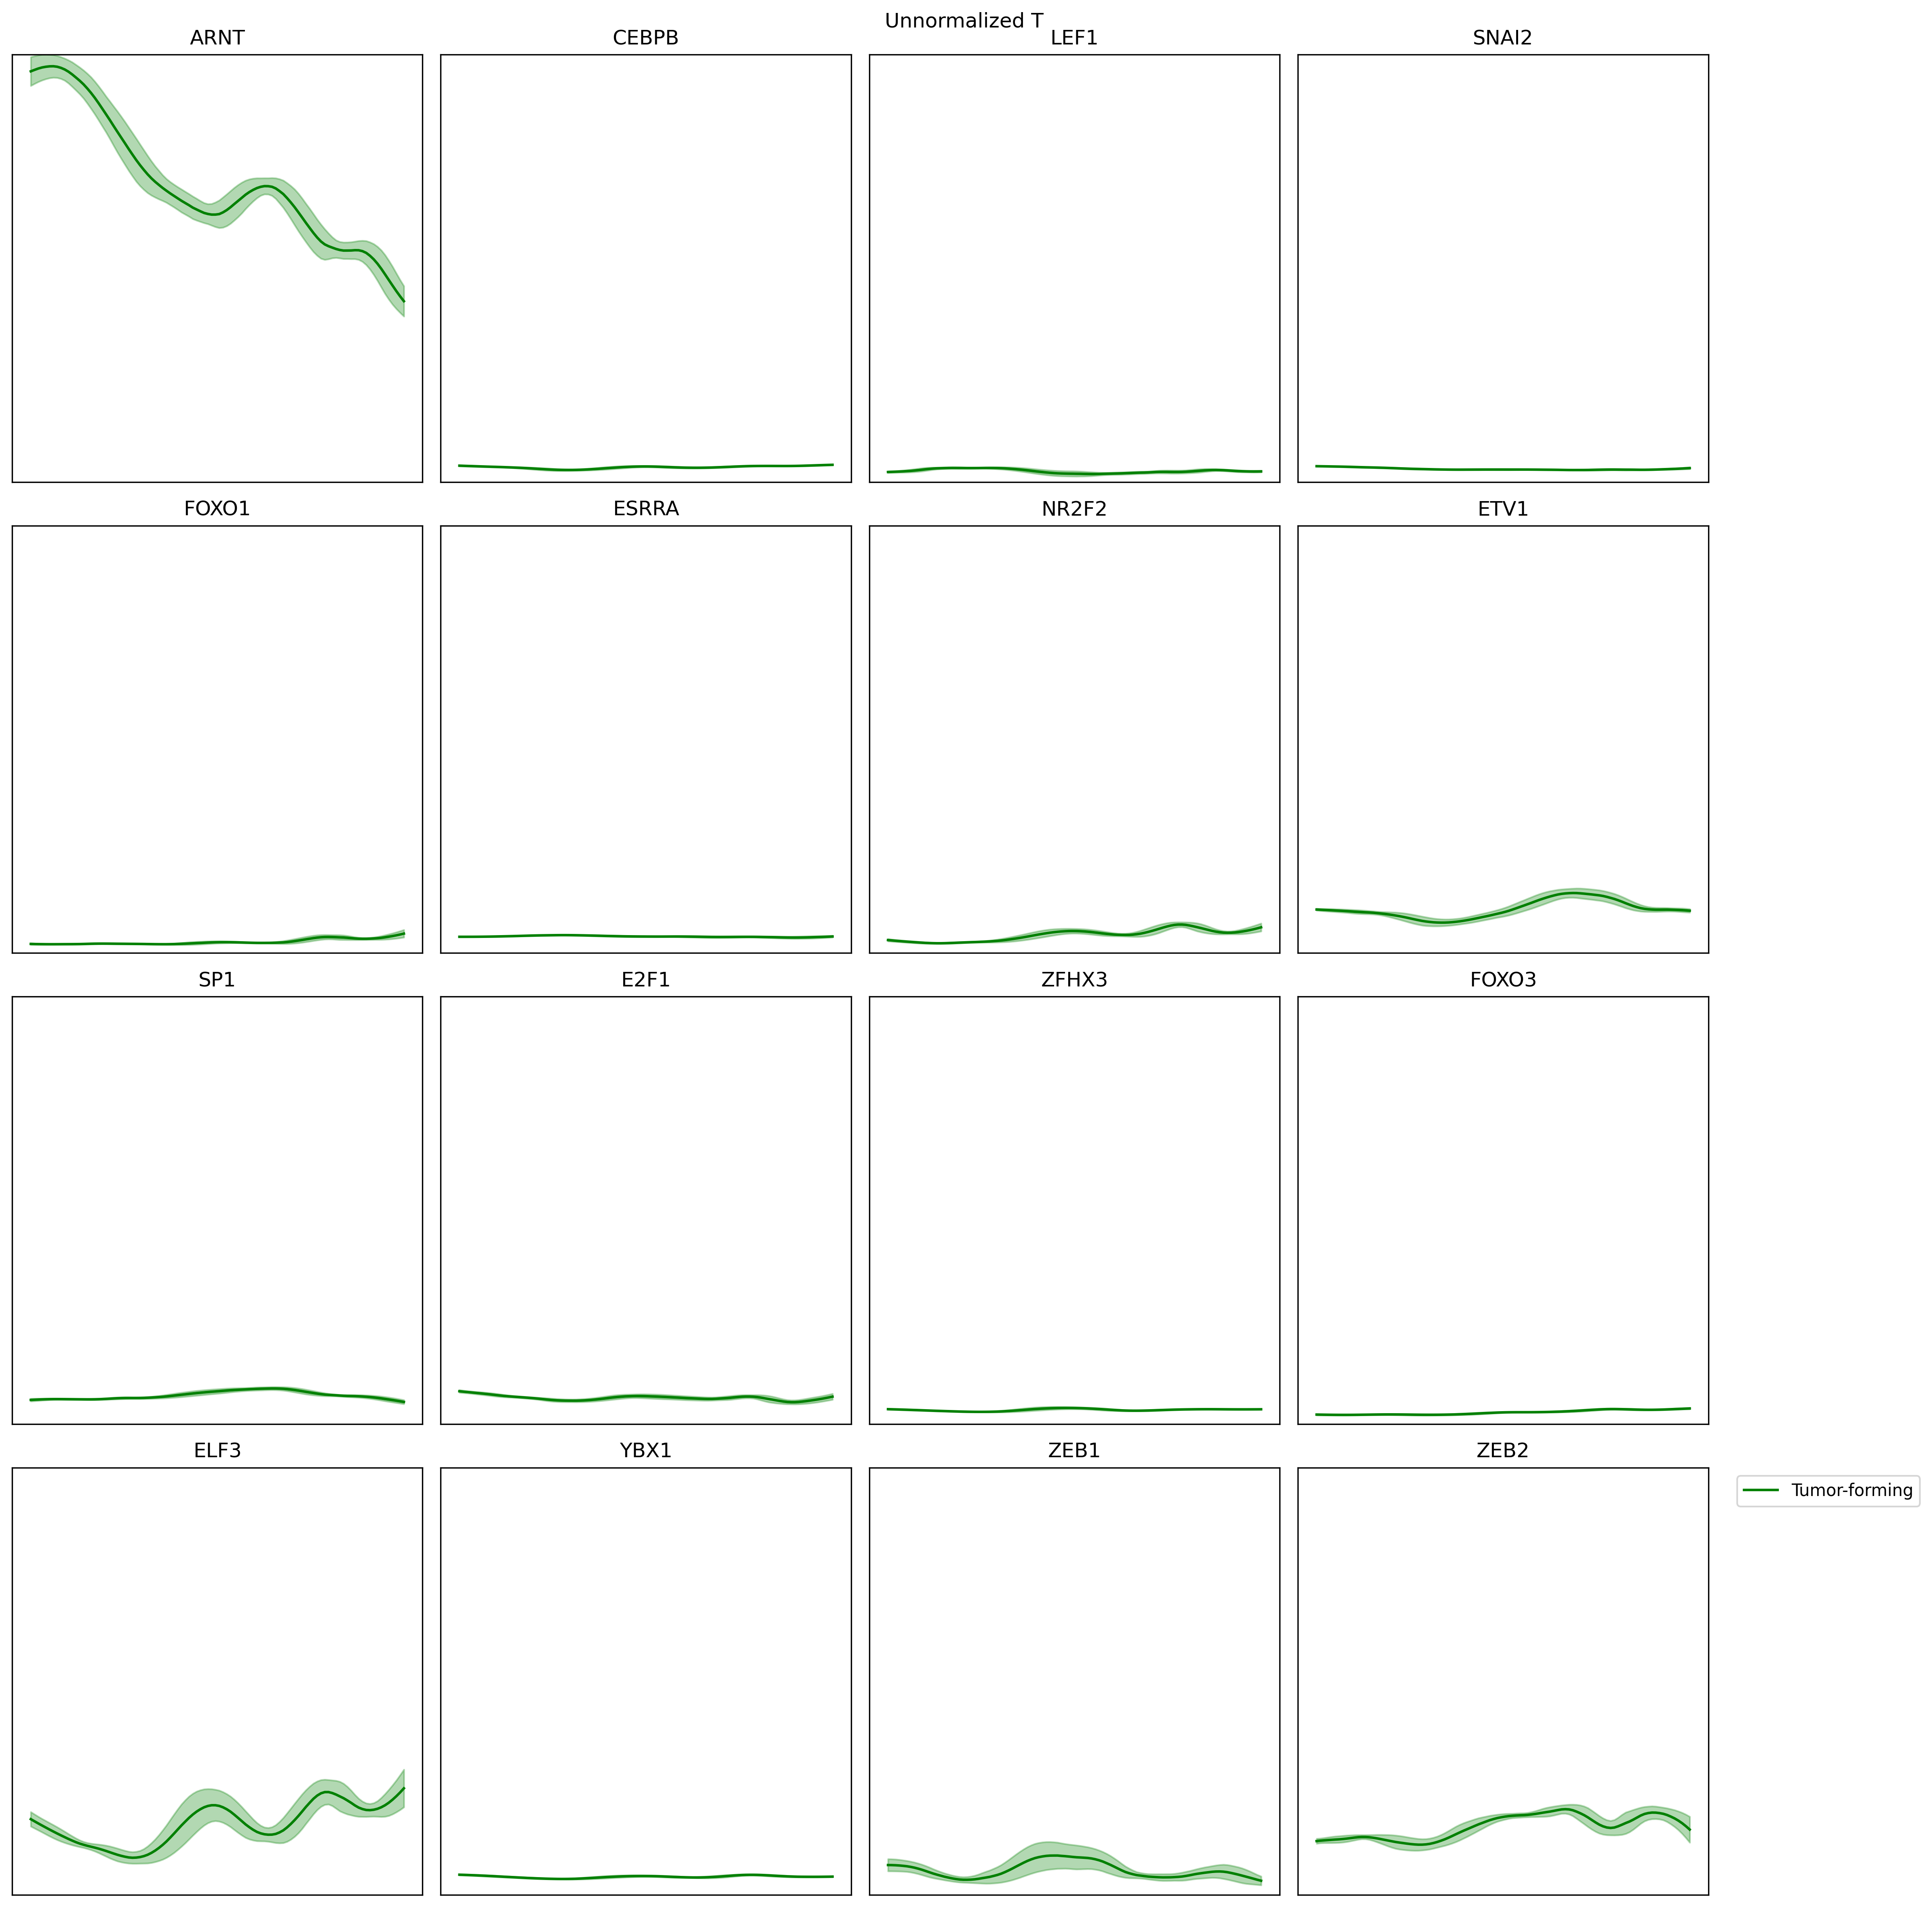

In [14]:
# genes_to_plot = top_apoptosis_markers_pos
# gene_mask = np.isin(adata.var_names, genes_to_plot)
# traj_A_gene = traj_A_gene_all[:, :, gene_mask]
# traj_T_gene = traj_T_gene_all[:, :, gene_mask]
# gene_names = adata.var_names[gene_mask]

# traj_A_mean = np.mean(traj_A_gene, axis=1)
# traj_A_std = np.std(traj_A_gene, axis=1)
# traj_T_mean = np.mean(traj_T_gene, axis=1)
# traj_T_std = np.std(traj_T_gene, axis=1)

# Calculate number of rows and columns for a roughly square grid
n_genes = len(genes_to_plot)
n_cols = int(np.ceil(np.sqrt(n_genes)))
n_rows = int(np.ceil(n_genes / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows), dpi=300)
axes = axes.flatten()  # Flatten axes array for easier indexing

for i, gene in enumerate(genes_to_plot):
    ax = axes[i]
    # ax.plot(traj_A_mean[:, i], color='orange', label='Apoptotic')
    # ax.fill_between(range(traj_A_mean.shape[0]), traj_A_mean[:, i] - traj_A_std[:, i], traj_A_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='orange')
    ax.plot(traj_T_mean[:, i], color='green', label='Tumor-forming')
    ax.fill_between(range(traj_T_mean.shape[0]), traj_T_mean[:, i] - traj_T_std[:, i], traj_T_mean[:, i] + traj_T_std[:, i], alpha=0.3, color='green')
    ax.set_title(gene)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.set_ylim(y_min, y_max)  # Set same y-axis limits for all subplots

# Hide any empty subplots
for i in range(len(genes_to_plot), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Unnormalized T')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
# plt.savefig(f'{save_path}/apoptosis_markers_up.png', bbox_inches='tight', dpi=300)
plt.show()

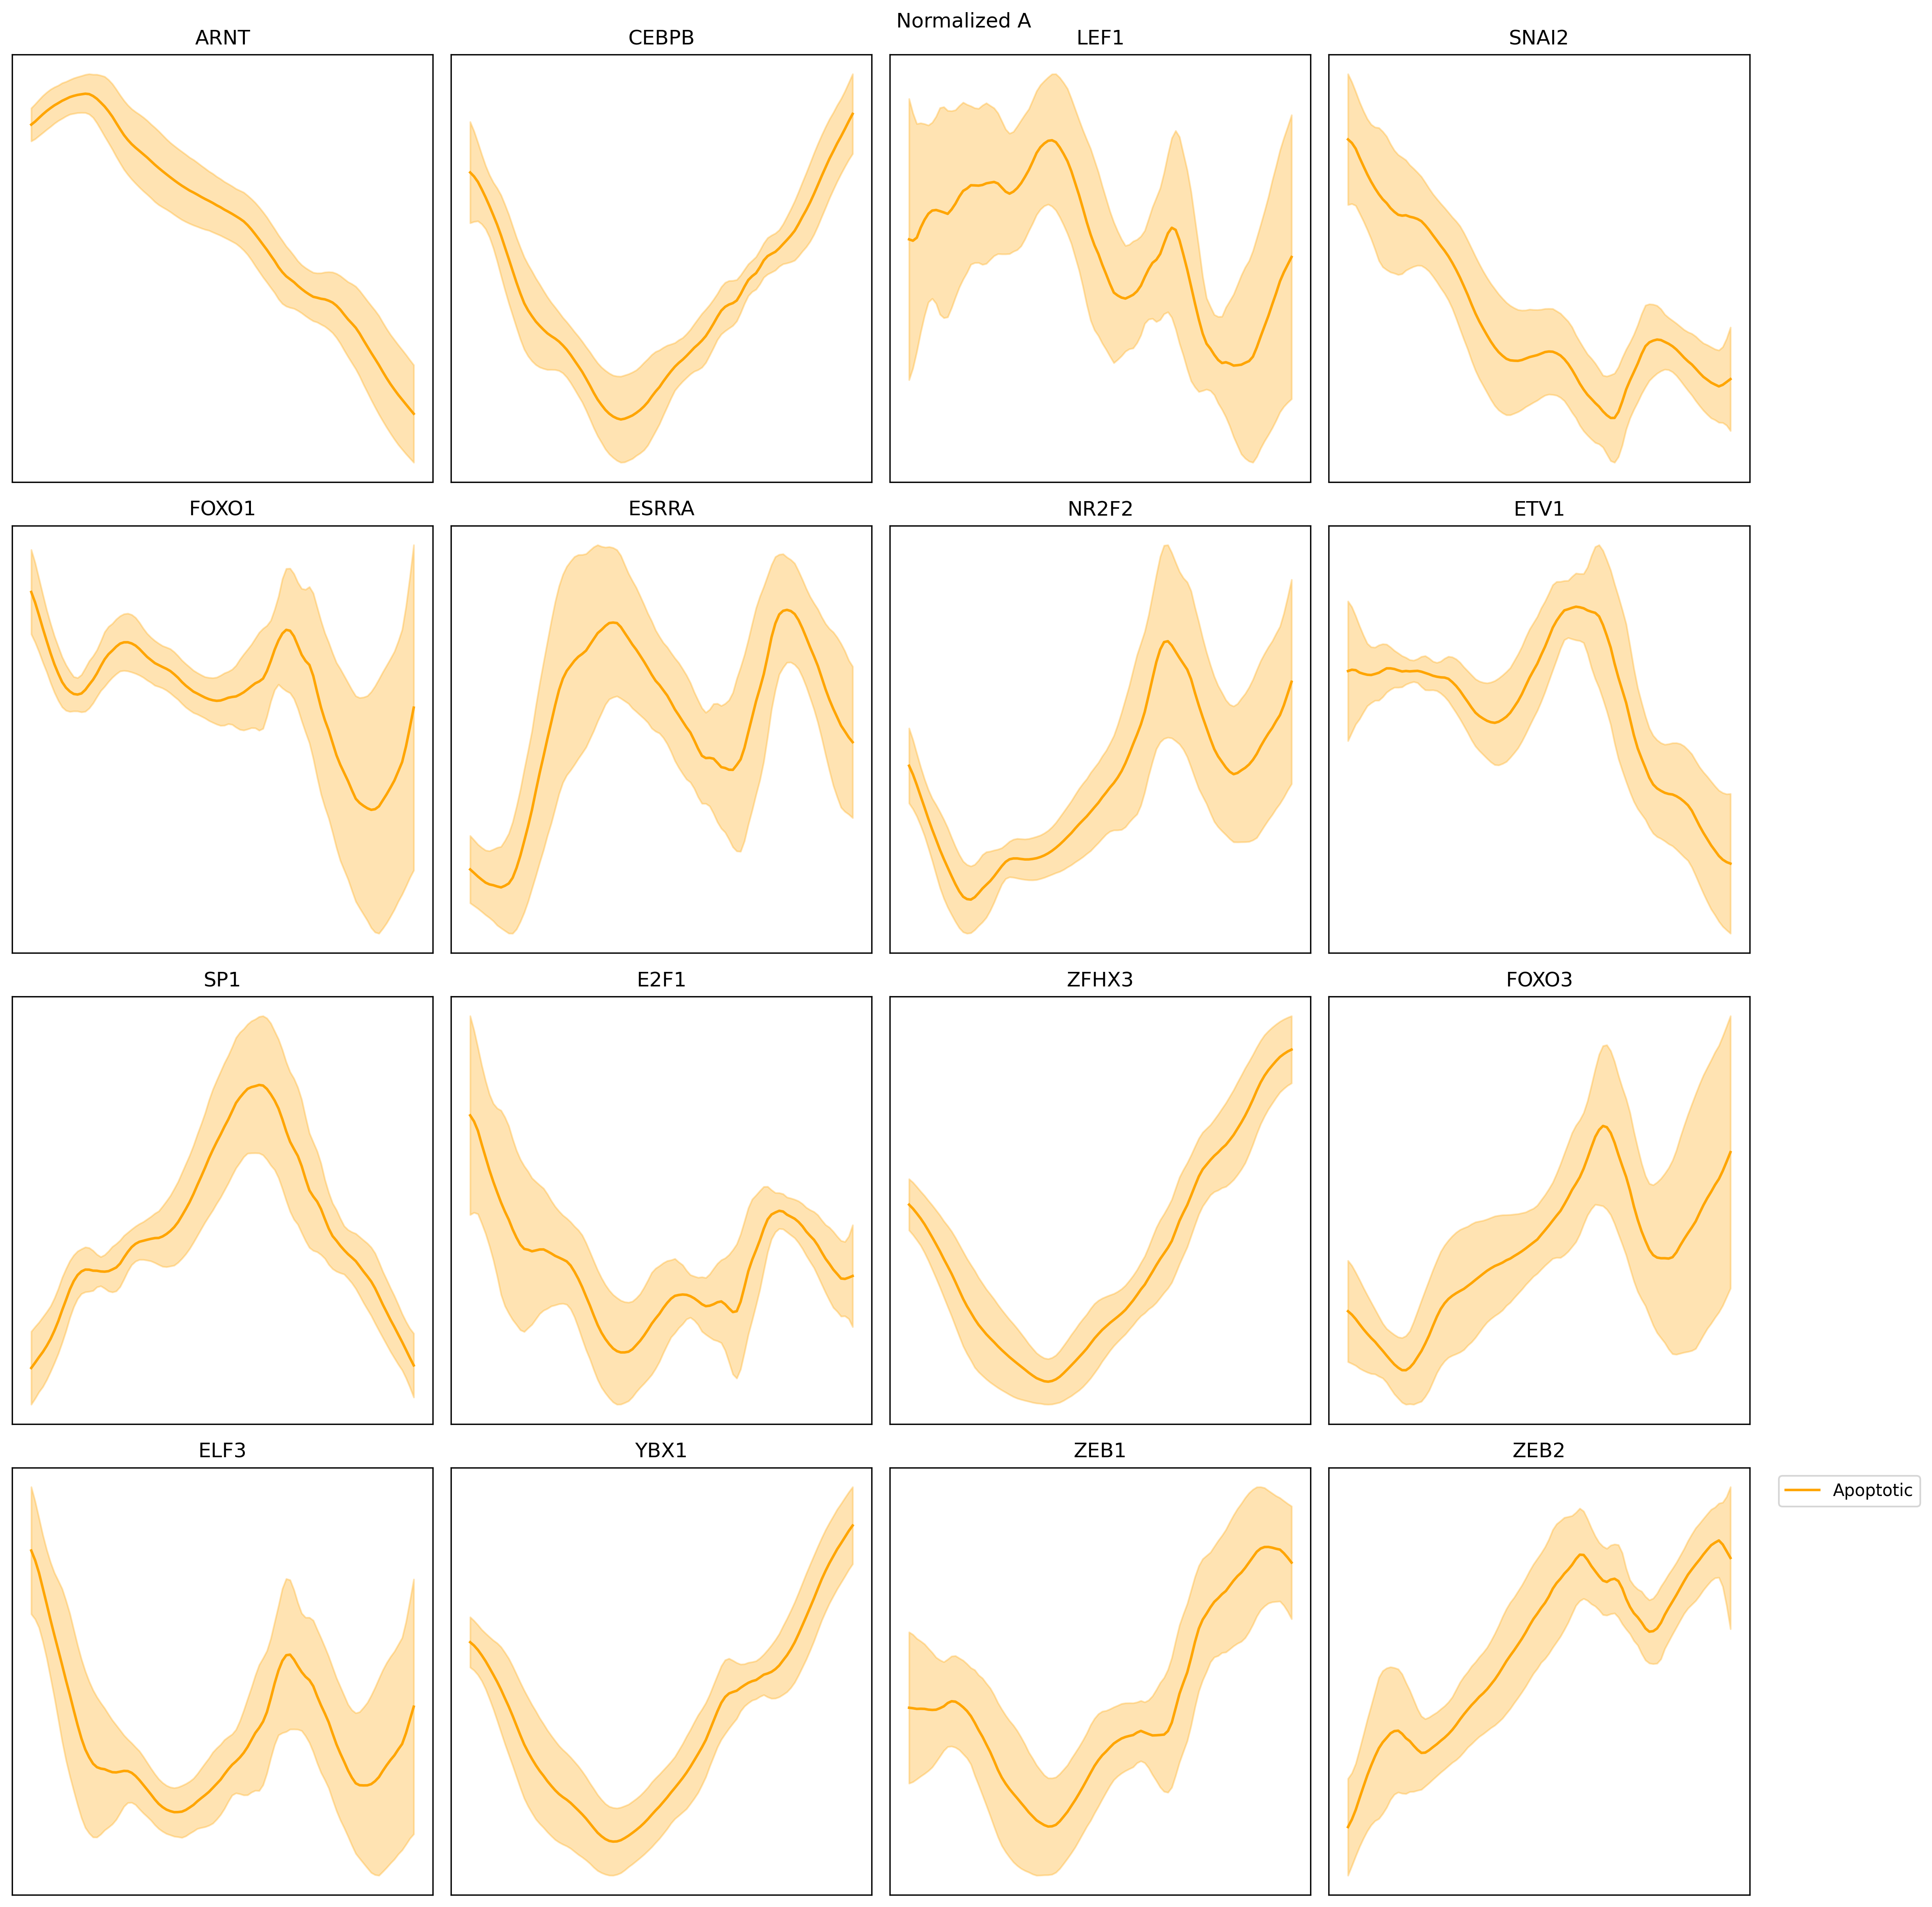

In [15]:
# genes_to_plot = top_apoptosis_markers_pos
# gene_mask = np.isin(adata.var_names, genes_to_plot)
# traj_A_gene = traj_A_gene_all[:, :, gene_mask]
# traj_T_gene = traj_T_gene_all[:, :, gene_mask]
# gene_names = adata.var_names[gene_mask]

# traj_A_mean = np.mean(traj_A_gene, axis=1)
# traj_A_std = np.std(traj_A_gene, axis=1)
# traj_T_mean = np.mean(traj_T_gene, axis=1)
# traj_T_std = np.std(traj_T_gene, axis=1)

# Calculate number of rows and columns for a roughly square grid
n_genes = len(genes_to_plot)
n_cols = int(np.ceil(np.sqrt(n_genes)))
n_rows = int(np.ceil(n_genes / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows), dpi=300)
axes = axes.flatten()  # Flatten axes array for easier indexing

for i, gene in enumerate(genes_to_plot):
    ax = axes[i]
    ax.plot(traj_A_mean[:, i], color='orange', label='Apoptotic')
    ax.fill_between(range(traj_A_mean.shape[0]), traj_A_mean[:, i] - traj_A_std[:, i], traj_A_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='orange')
    # ax.plot(traj_T_mean[:, i], color='green', label='Tumor-forming')
    # ax.fill_between(range(traj_T_mean.shape[0]), traj_T_mean[:, i] - traj_T_std[:, i], traj_T_mean[:, i] + traj_T_std[:, i], alpha=0.3, color='green')
    ax.set_title(gene)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

# Hide any empty subplots
for i in range(len(genes_to_plot), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Normalized A')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
# plt.savefig(f'{save_path}/apoptosis_markers_up.png', bbox_inches='tight', dpi=300)
plt.show()

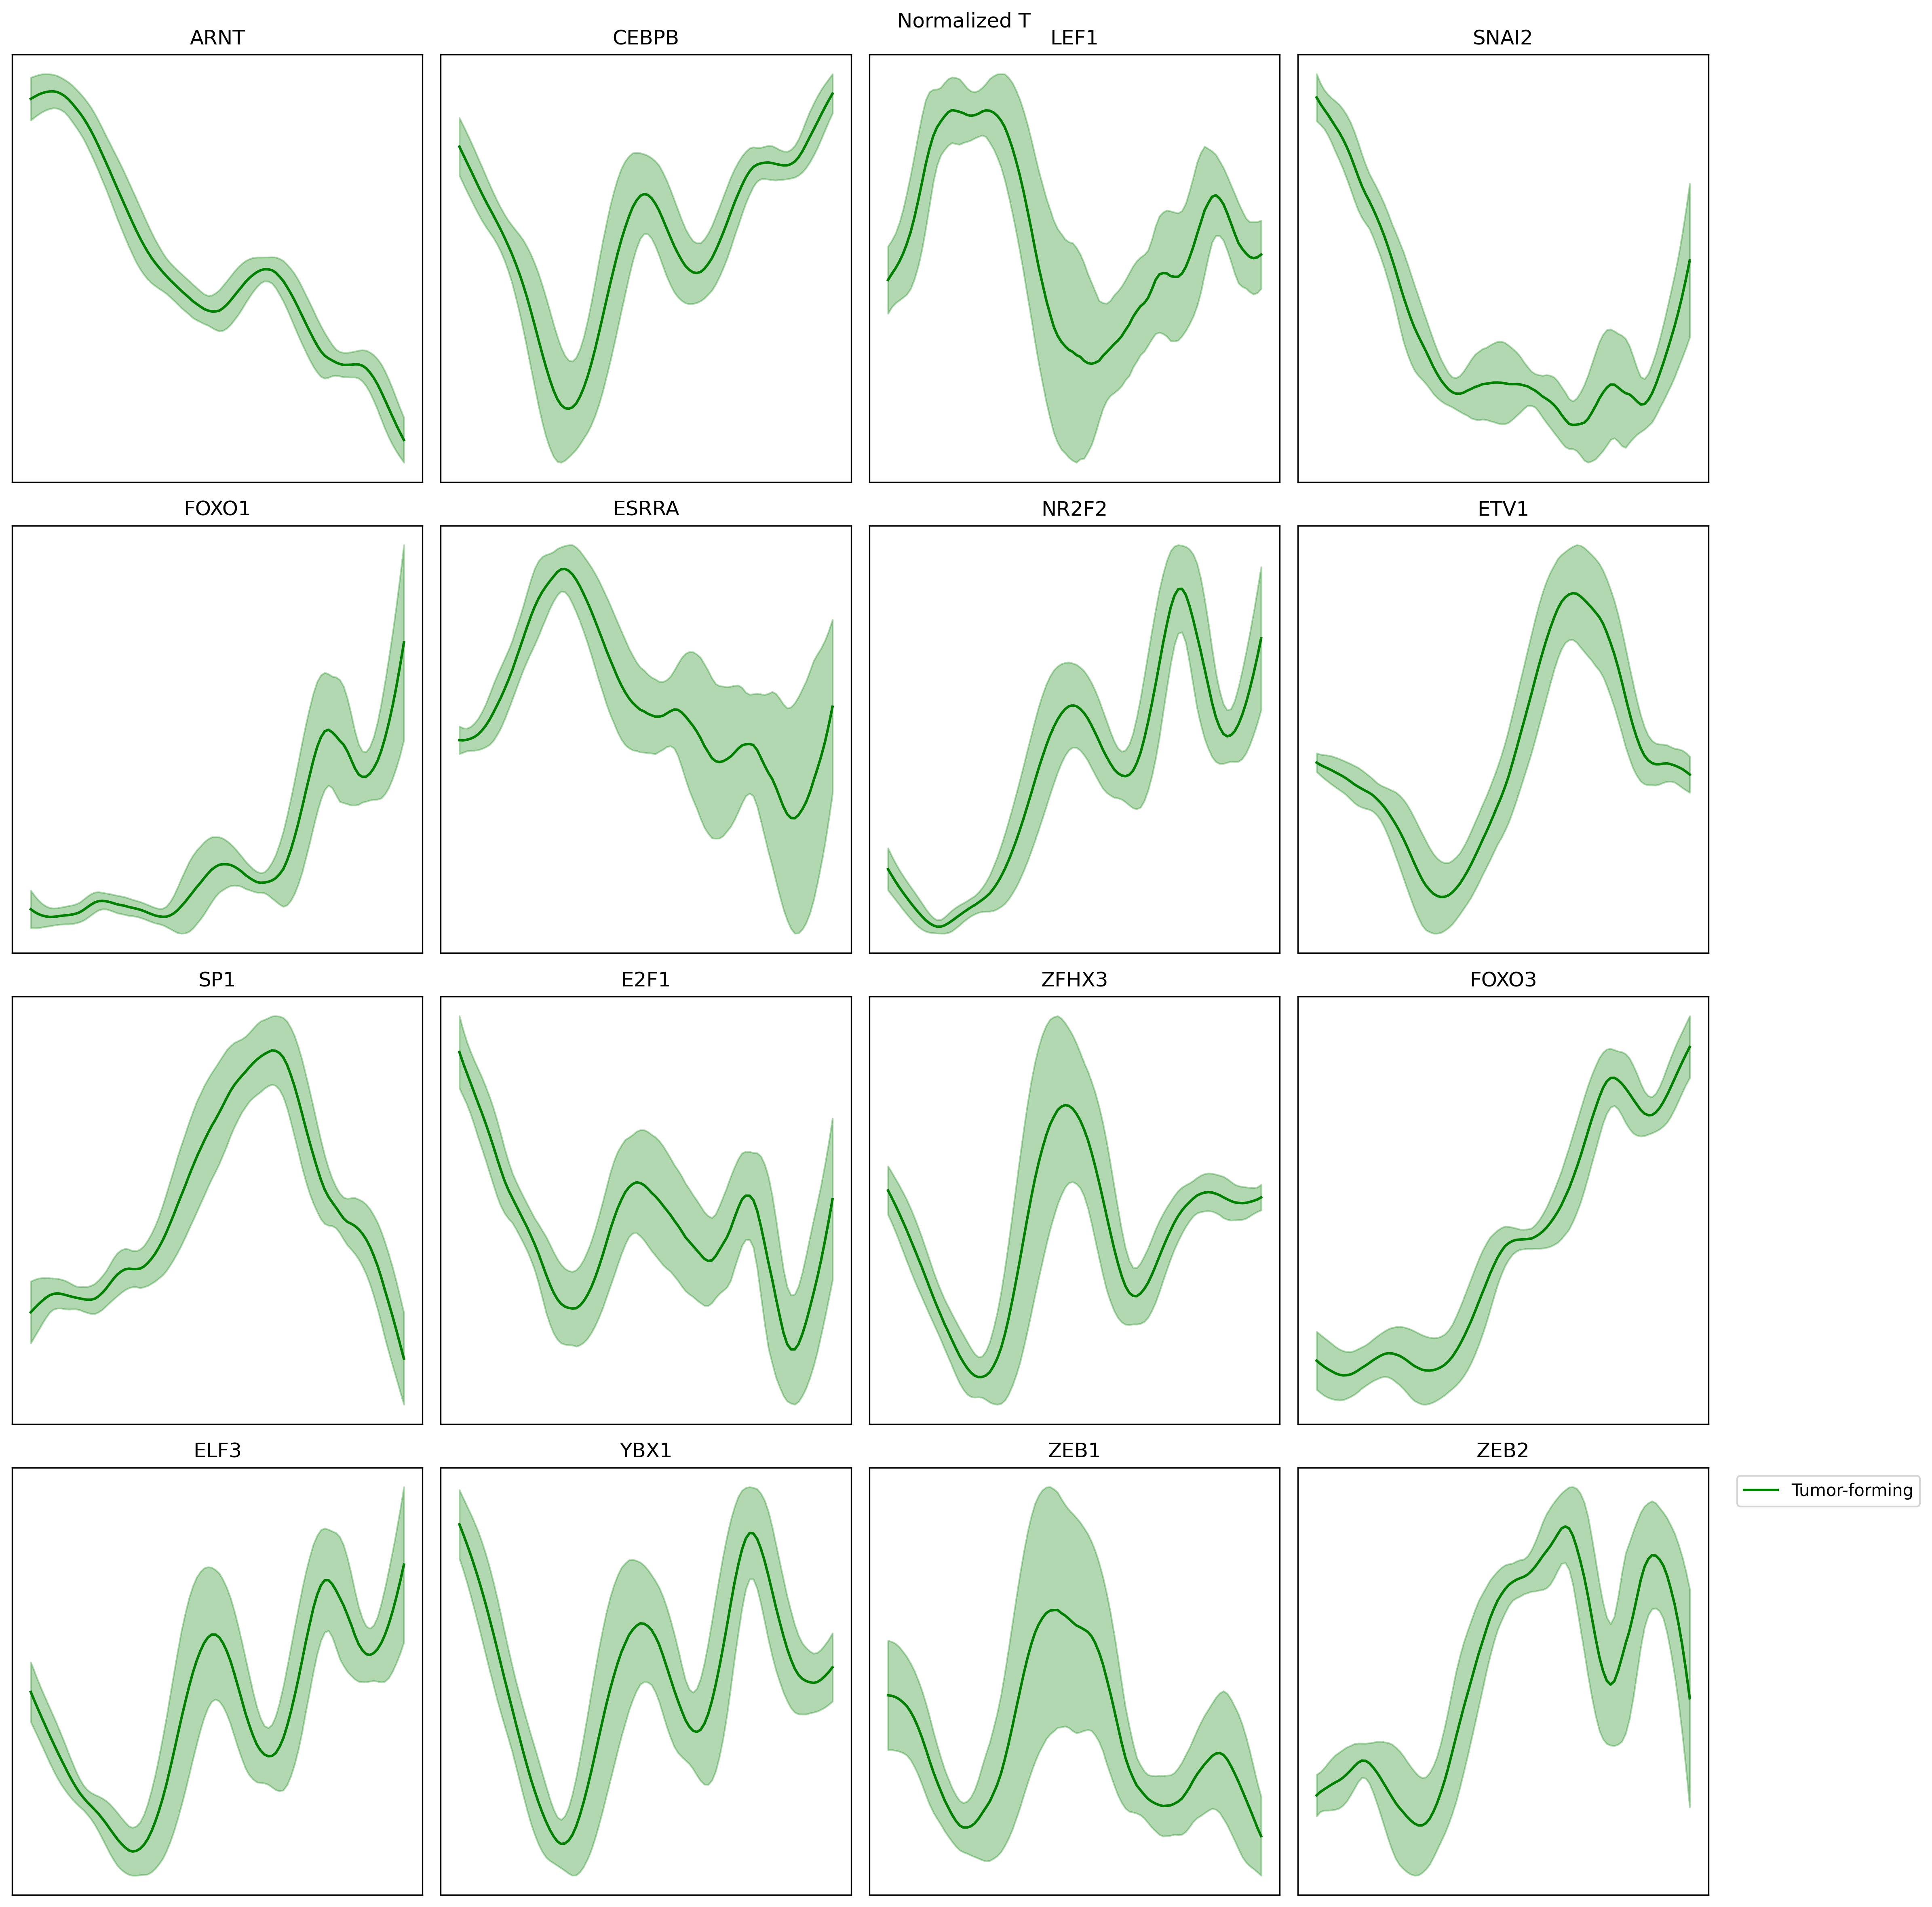

In [16]:
# genes_to_plot = top_apoptosis_markers_pos
# gene_mask = np.isin(adata.var_names, genes_to_plot)
# traj_A_gene = traj_A_gene_all[:, :, gene_mask]
# traj_T_gene = traj_T_gene_all[:, :, gene_mask]
# gene_names = adata.var_names[gene_mask]

# traj_A_mean = np.mean(traj_A_gene, axis=1)
# traj_A_std = np.std(traj_A_gene, axis=1)
# traj_T_mean = np.mean(traj_T_gene, axis=1)
# traj_T_std = np.std(traj_T_gene, axis=1)

# Calculate number of rows and columns for a roughly square grid
n_genes = len(genes_to_plot)
n_cols = int(np.ceil(np.sqrt(n_genes)))
n_rows = int(np.ceil(n_genes / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows), dpi=300)
axes = axes.flatten()  # Flatten axes array for easier indexing

for i, gene in enumerate(genes_to_plot):
    ax = axes[i]
    # ax.plot(traj_A_mean[:, i], color='orange', label='Apoptotic')
    # ax.fill_between(range(traj_A_mean.shape[0]), traj_A_mean[:, i] - traj_A_std[:, i], traj_A_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='orange')
    ax.plot(traj_T_mean[:, i], color='green', label='Tumor-forming')
    ax.fill_between(range(traj_T_mean.shape[0]), traj_T_mean[:, i] - traj_T_std[:, i], traj_T_mean[:, i] + traj_T_std[:, i], alpha=0.3, color='green')
    ax.set_title(gene)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

# Hide any empty subplots
for i in range(len(genes_to_plot), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Normalized T')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
# plt.savefig(f'{save_path}/apoptosis_markers_up.png', bbox_inches='tight', dpi=300)
plt.show()